In [51]:
import pandas as pd
from random import randint
import matplotlib.pyplot as plt
import numpy as np


# Create a variable for data file name
output_filename = "../data/iisc_students.csv"

# Initialize empty list
data = []

# Number of data samples
N = 8000

# Create normal distribution of male weights
mu = 72 # mean
sigma = 5 # standard deviation
male_weights = np.random.normal(mu, sigma, N)


# Create normal distribution of female weights
mu = 63 # mean
sigma = 5 # standard deviation
female_weights = np.random.normal(mu, sigma, N)

# Iterate from 0 to N-1
for i in range(N):

    # Create a dummy person, 
    person = {
        "id": i+1,
        "weight": 0,
        "gender": "F"
    }

    # Alternate gender between male and female
    person["gender"] = "M" if i % 2 == 0 else "F"
    person["weight"] = male_weights[randint(0, N-1)] if i % 2 == 0 else female_weights[randint(0, N-1)]

    # Append to list
    data.append(person)

# -----------------------------------------------

# Create data frame
df = pd.DataFrame(data)

# Write data to a .csv file
df.to_csv(output_filename, index=False)


In [49]:
# For weights
males = df.loc[(df["gender"] == "M")]
females = df.loc[(df["gender"] == "F")]

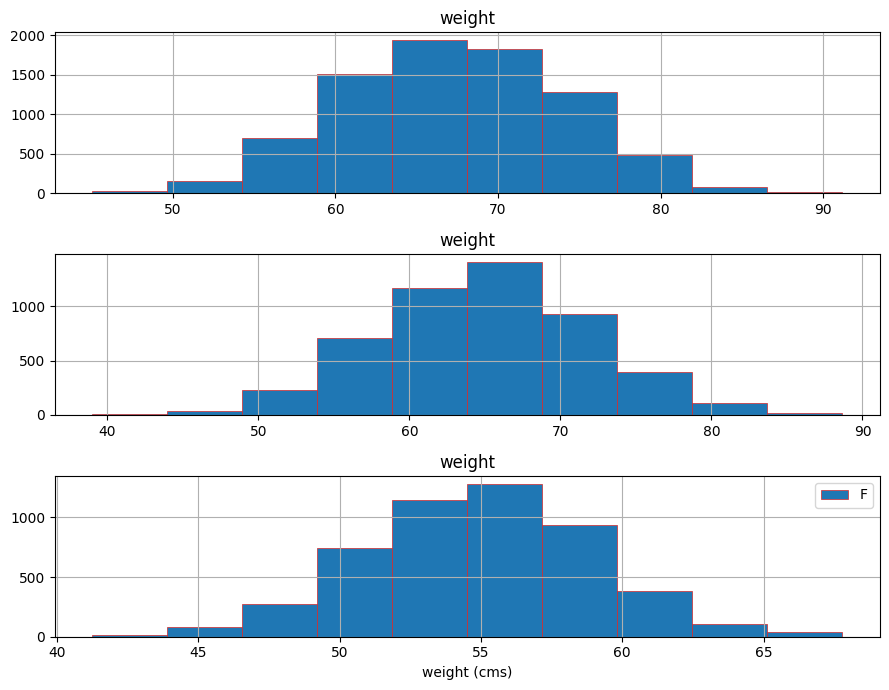

In [56]:
# Initialise the subplot function using number of rows and columns
plt.close()

figure, ax = plt.subplots(2, 1)
style = {'edgecolor': 'C3', 'linewidth': 0.5}

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = [9, 7]

plt.xlabel('weight (cms)')

number_of_bins = 10
df.hist("weight", label="All", ax=ax[0], bins=number_of_bins, **style)
males.hist("weight", label="M", ax=ax[1], bins=number_of_bins, **style)
females.hist("weight", label="F", ax=ax[1], bins=number_of_bins, **style)

plt.legend(loc='upper right')

# Combine all the operations and display
plt.show()